In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [3]:
cars= pd.read_csv(r"Z:\Purva226518\Datasets\cars_data.csv")
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Check Data Types

In [4]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Missing Values?

In [5]:
cars=cars.dropna()

In [6]:
cars.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [7]:
for i in cars.columns:
    print(cars[i].value_counts())

Chevrolet        614
Volkswagen       581
Ford             492
Cadillac         397
Mercedes-Benz    352
BMW              334
Infiniti         330
Audi             328
Dodge            320
Nissan           308
Toyota           300
Honda            282
Volvo            281
GMC              270
Acura            252
Mazda            239
Subaru           214
Hyundai          214
Lexus            202
Lincoln          156
Land Rover       143
Porsche          136
Mitsubishi       125
Buick            125
Saab             111
Kia              109
Chrysler         108
Suzuki            99
Aston Martin      93
Pontiac           77
Bentley           74
Ferrari           68
Maserati          58
Lamborghini       52
Scion             48
Plymouth          39
FIAT              38
Rolls-Royce       31
Lotus             29
HUMMER            17
Maybach           16
Alfa Romeo         5
McLaren            5
Spyker             3
Genesis            3
Oldsmobile         3
Bugatti            3
Name: Make, d

# Data Visualization

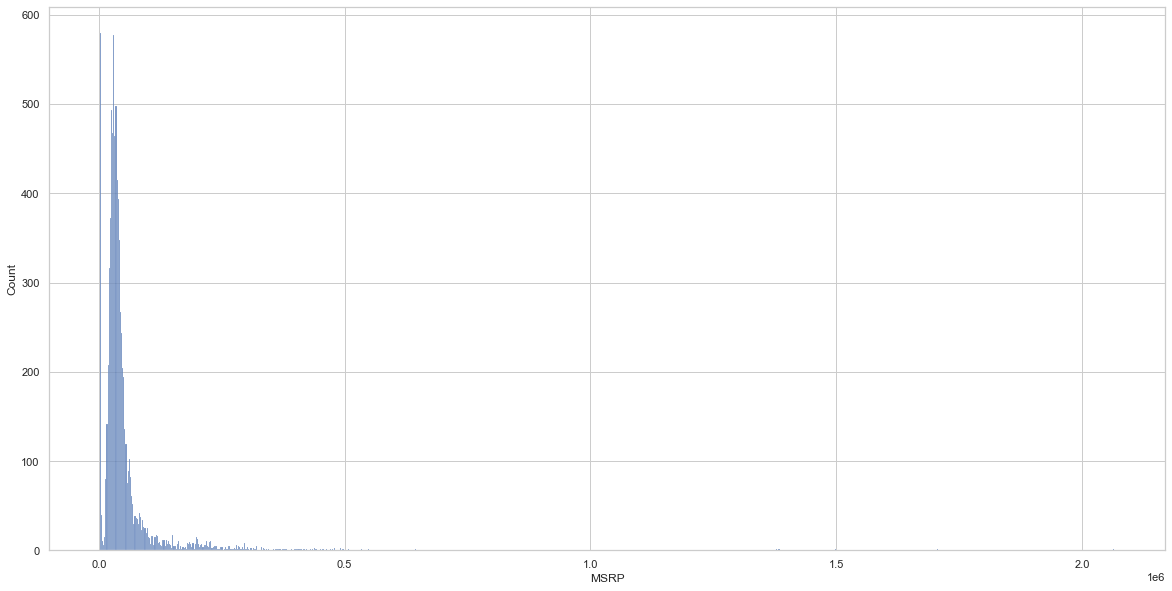

In [25]:
plt.figure(figsize=(20, 10))
sns.histplot(x='MSRP',data=cars);

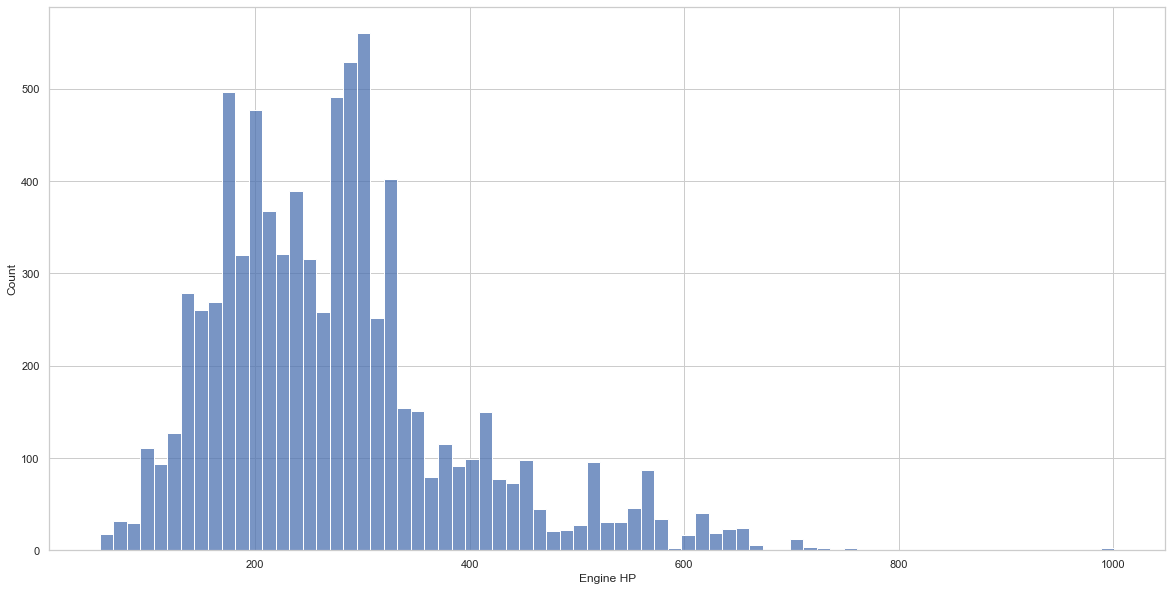

In [26]:
plt.figure(figsize=(20, 10))
sns.histplot(x='Engine HP',data=cars);

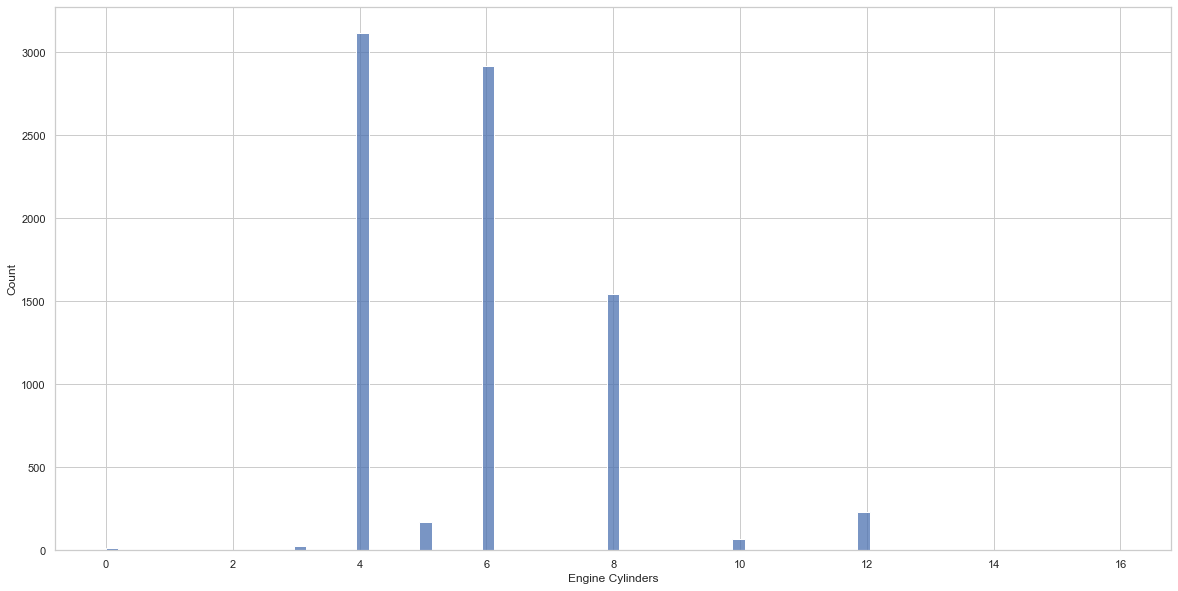

In [27]:
plt.figure(figsize=(20, 10))
sns.histplot(x='Engine Cylinders',data=cars);

In [9]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Create Dummy Variables

In [10]:
cars=pd.get_dummies(cars,columns=['Engine Fuel Type','Transmission Type', 'Driven_Wheels',
                                  'Market Category', 'Vehicle Size', 'Vehicle Style'])
cars

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,BMW,1 Series M,2011,335.0,6.0,2.0,26,19,3916,46135,...,0,0,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,300.0,6.0,2.0,28,19,3916,40650,...,1,0,0,0,0,0,0,0,0,0
2,BMW,1 Series,2011,300.0,6.0,2.0,28,20,3916,36350,...,0,0,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,230.0,6.0,2.0,28,18,3916,29450,...,0,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,230.0,6.0,2.0,28,18,3916,34500,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,4.0,23,16,204,46120,...,0,0,0,0,0,0,0,0,0,0
11910,Acura,ZDX,2012,300.0,6.0,4.0,23,16,204,56670,...,0,0,0,0,0,0,0,0,0,0
11911,Acura,ZDX,2012,300.0,6.0,4.0,23,16,204,50620,...,0,0,0,0,0,0,0,0,0,0
11912,Acura,ZDX,2013,300.0,6.0,4.0,23,16,204,50920,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y=['Churn_Yes']
X=['InternetService_No','PaperlessBilling_Yes','PhoneService_Yes','Dependents_Yes','Contract_Month-to-month','Contract_One year','tenure','MonthlyCharges','TotalCharges']

In [97]:
pd.DataFrame(churn[X])

,InternetService_No,PaperlessBilling_Yes,PhoneService_Yes,Dependents_Yes,Contract_Month-to-month,Contract_One year,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,0,0,1,34,56.95,1889.50
2,0,1,1,0,1,0,2,53.85,108.15
3,0,0,0,0,0,1,45,42.30,1840.75
4,0,1,1,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,1,24,84.80,1990.50
7039,0,1,1,1,0,1,72,103.20,7362.90
7040,0,1,0,1,1,0,11,29.60,346.45
7041,0,1,1,0,1,0,4,74.40,306.60


# Predictors

In [98]:
x=np.array(churn[X])[:,:-1]
x

array([[  0.  ,   1.  ,   0.  , ...,   0.  ,   1.  ,  29.85],
       [  0.  ,   0.  ,   1.  , ...,   1.  ,  34.  ,  56.95],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   2.  ,  53.85],
       ...,
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  11.  ,  29.6 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   4.  ,  74.4 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  66.  , 105.65]])

# Dependent Variable

In [99]:
y=np.array(churn['Churn_Yes'])
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

# Training and Testing data

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [131]:
x_train

array([[ 0.  ,  1.  ,  1.  , ...,  0.  ,  9.  , 72.9 ],
       [ 0.  ,  1.  ,  1.  , ...,  0.  , 14.  , 82.65],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 64.  , 47.85],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  0.  , 58.  , 20.75],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  1.  , 69.75],
       [ 1.  ,  0.  ,  1.  , ...,  0.  ,  4.  , 20.4 ]])

# Decision Tree

In [132]:
model=DecisionTreeClassifier(criterion = "gini")
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict the results

In [133]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [134]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Check accuracy score

In [135]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9899
Test set score: 0.7236


Since for both the training set the accuracy is higher significantly, there is overfitting.

# Confusion Matrix

In [136]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1268  292]
 [ 292  261]]

True Positives(TP) =  1268

True Negatives(TN) =  261

False Positives(FP) =  292

False Negatives(FN) =  292


The confusion matrix shows 1268+261 = 1529 correct predictions and 261+292 = 553 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 1268 True Negatives (Actual Negative:0 and Predict Negative:0) - 261 False Positives (Actual Negative:0 but Predict Positive:1) - 292 (Type I error) False Negatives (Actual Positive:1 but Predict Negative:0) - 292 (Type II error)

<AxesSubplot:>

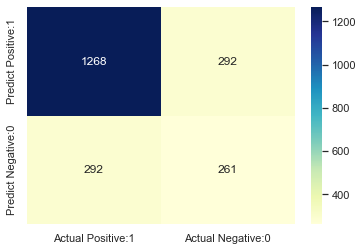

In [140]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1560
           1       0.47      0.47      0.47       553

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



## Classification accuracy

In [142]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [143]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7236


## Classification error

In [144]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2764


## Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [145]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8128


## Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [146]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8128


## True Positive Rate
True Positive Rate is synonymous with Recall.

In [147]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8128


## False Positive Rate

In [148]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5280


## Specificity

In [149]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4720
